# Projeto 1: Fase de Data Understanding (CRISP-DM)

**Objetivo:** Explorar o dataset "Screen Time vs Mental Wellness" para compreender as suas características, qualidade e encontrar primeiros *insights*.

## 0. Importar Bibliotecas


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")
%matplotlib inline

## 1. Recolha Inicial dos Dados

In [5]:
# Carregar o dataset
try:
    df = pd.read_csv("../assets/ScreenTime vs MentalWellness.csv")
except FileNotFoundError:
    print("Erro: Ficheiro 'ScreenTime vs MentalWellness.csv' não encontrado.")

if 'df' in locals():
    print(df.head())

  user_id  age  gender occupation  work_mode  screen_time_hours  \
0   U0001   33  Female   Employed     Remote              10.79   
1   U0002   28  Female   Employed  In-person               7.40   
2   U0003   35  Female   Employed     Hybrid               9.78   
3   U0004   42    Male   Employed     Hybrid              11.13   
4   U0005   28    Male    Student     Remote              13.22   

   work_screen_hours  leisure_screen_hours  sleep_hours  sleep_quality_1_5  \
0               5.44                  5.35         6.63                  1   
1               0.37                  7.03         8.05                  3   
2               1.09                  8.69         6.48                  1   
3               0.56                 10.57         6.89                  1   
4               4.09                  9.13         5.79                  1   

   stress_level_0_10  productivity_0_100  exercise_minutes_per_week  \
0                9.3                44.7                 

## 2. Descrição dos Dados

In [6]:
if 'df' in locals():
    print(f"O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
    
    print("\n--- Informação das Colunas ---")
    df.info()

O dataset tem 400 linhas e 15 colunas.

--- Informação das Colunas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercis

**Observações Iniciais:** O dataset possui 400 linhas e 15 colunas. Não foram encontrados valores nulos, tampouco erros de tipagem de dados para corrigir.

## 3. Verificação da Qualidade dos Dados

In [7]:
if 'df' in locals():
    # Verificar valores em falta (missing values)
    print("--- Valores em Falta por Coluna ---")
    print(df.isnull().sum())
    
    # Verificar linhas duplicadas
    print("\n--- Linhas Duplicadas ---")
    print(f"Número de linhas duplicadas: {df.duplicated().sum()}")

--- Valores em Falta por Coluna ---
user_id                        0
age                            0
gender                         0
occupation                     0
work_mode                      0
screen_time_hours              0
work_screen_hours              0
leisure_screen_hours           0
sleep_hours                    0
sleep_quality_1_5              0
stress_level_0_10              0
productivity_0_100             0
exercise_minutes_per_week      0
social_hours_per_week          0
mental_wellness_index_0_100    0
dtype: int64

--- Linhas Duplicadas ---
Número de linhas duplicadas: 0


**Observações da Qualidade:**
Nenhum valor em falta ou duplicado encontrado no dataset.

## 4. Exploração dos Dados (EDA)

Análise Univariada e análise Multivariada.


### 4.1 Análise Univariada - Variáveis Numéricas

média, mediana, min, max. e distribuição (histogramas) das variáveis numéricas.

--- Estatísticas Descritivas (Numéricas) ---


,age,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.77750,9.024900,2.183075,6.841825,7.013175,1.397500,8.150500,54.306500,109.810000,7.905000,20.326750
std,7.46608,2.491058,1.931321,2.220896,0.852421,0.652348,2.094844,15.020054,70.007045,4.909632,20.376793
min,16.00000,1.000000,0.110000,0.890000,4.640000,1.000000,0.000000,20.600000,0.000000,0.000000,0.000000
25%,24.00000,7.372500,0.695000,5.460000,6.397500,1.000000,6.900000,43.600000,58.000000,4.575000,3.675000
50%,30.00000,9.090000,1.455000,6.700000,7.030000,1.000000,8.800000,51.750000,103.000000,7.750000,14.800000
75%,35.00000,10.495000,3.012500,8.417500,7.640000,2.000000,10.000000,63.000000,157.000000,11.025000,30.650000
max,60.00000,19.170000,12.040000,13.350000,9.740000,4.000000,10.000000,100.000000,372.000000,23.900000,97.000000


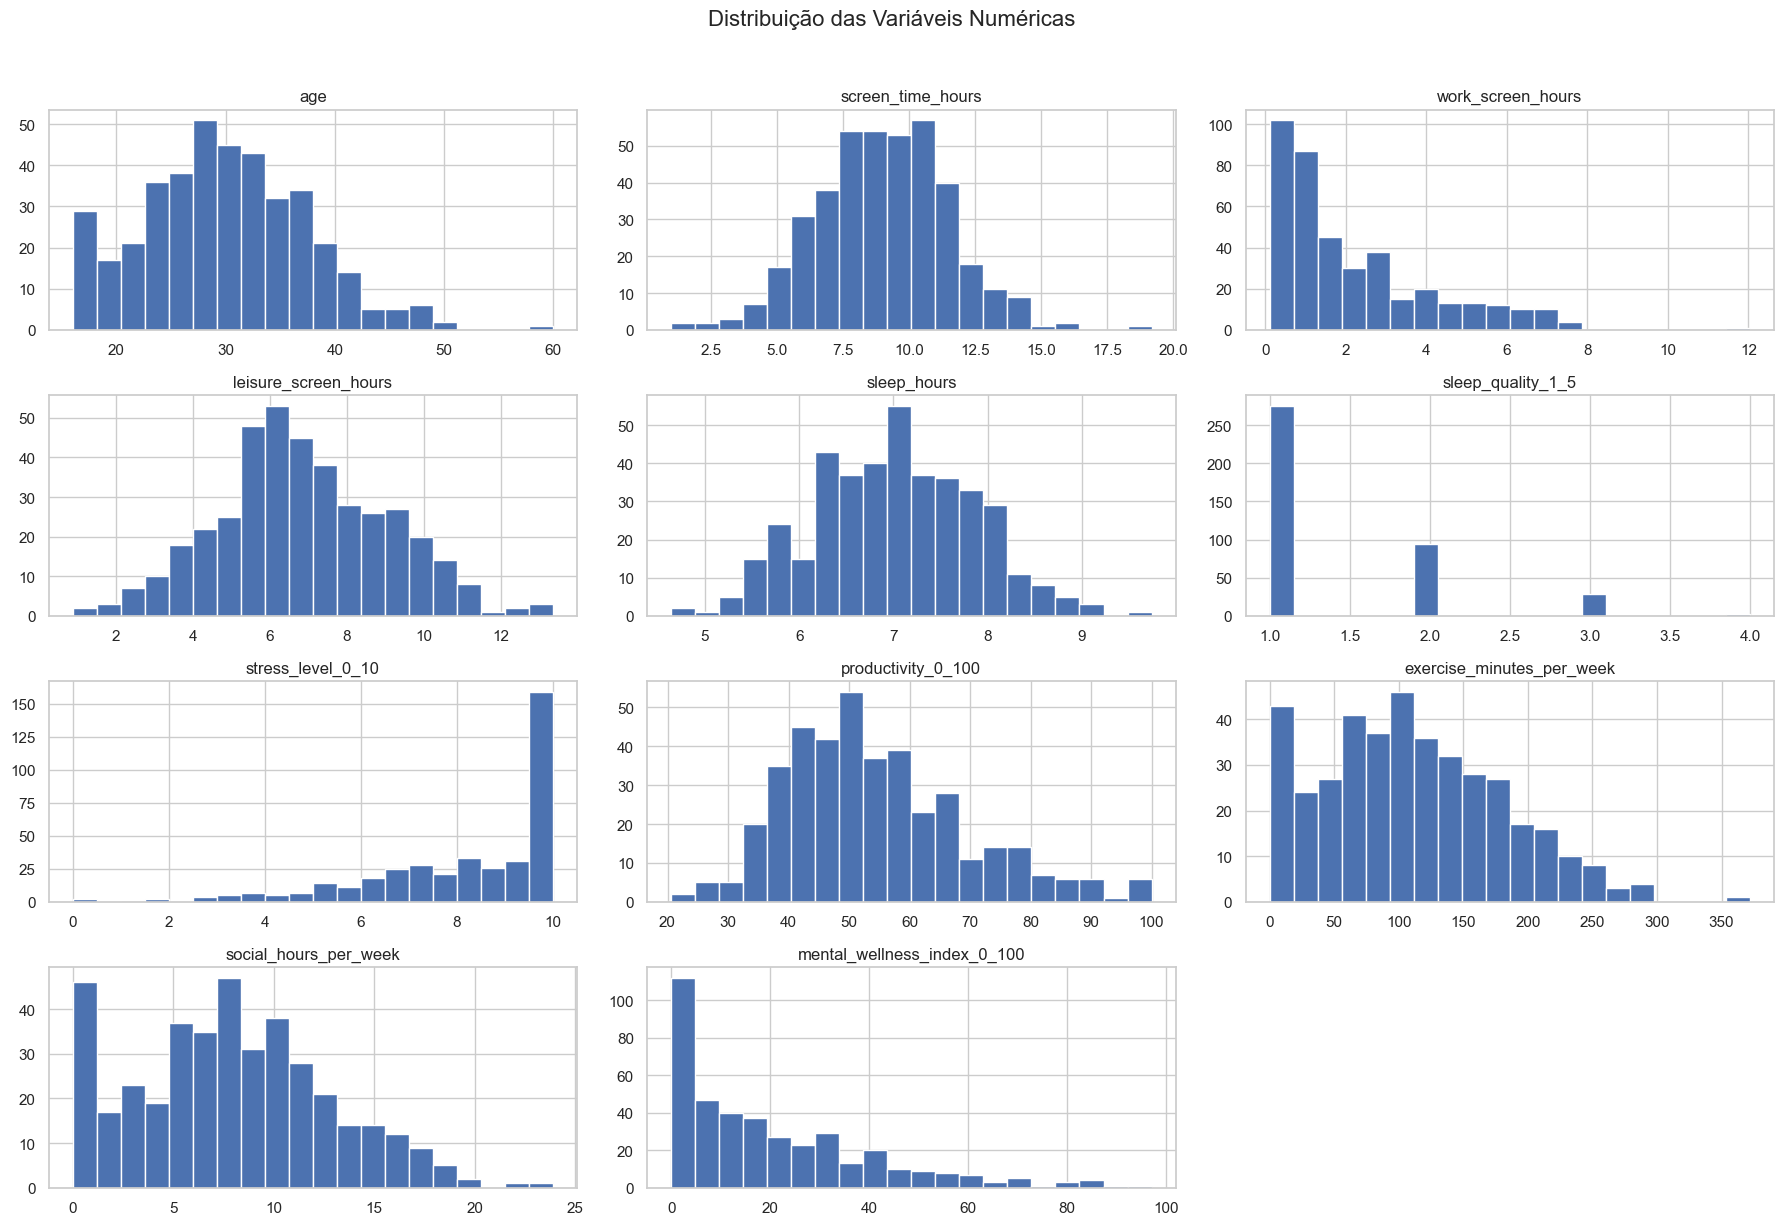

In [8]:
if 'df' in locals():
    print("--- Estatísticas Descritivas (Numéricas) ---")
    # include='number' garante que buscamos apenas variáveis numéricas
    display(df.describe(include='number'))
    
    # Plotar histogramas para todas as variáveis numéricas
    numerical_cols = df.select_dtypes(include='number').columns
    
    if 'user_id' in numerical_cols:
        numerical_cols = numerical_cols.drop('user_id') # user ID não é uma variável, portanto, excluímos dos gráficos.
        
    df[numerical_cols].hist(bins=20, figsize=(18, 12), layout=(-1, 3))
    plt.suptitle("Distribuição das Variáveis Numéricas", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

**Observações (Histogramas):**

- `age`: A distribuição é aproximadamente normal (unimodal e razoavelmente simétrica), com uma leve assimetria à direita. A maioria dos participantes concentra-se na faixa dos 25 aos 40 anos, com um pico claro por volta dos 30-35 anos.

- `screen_time_hours`: Apresenta uma distribuição normal quase perfeita (simétrica e unimodal). O tempo de tela total está bem centrado, com o pico de frequência ocorrendo em torno de 9-10 horas diárias.

- `work_screen_hours`: Possui uma forte assimetria à direita (positive skew). A grande maioria dos valores está concentrada perto de zero (0-2 horas). Isso sugere que muitos participantes não usam telas para o trabalho, ou usam muito pouco, havendo uma longa cauda de participantes que usam por mais tempo.

- `leisure_screen_hours`: Mostra uma leve assimetria à esquerda (negative skew). A maioria dos valores concentra-se na parte mais alta da distribuição, com um pico por volta de 6-7 horas.

- `sleep_hours`: Distribuição razoavelmente normal e simétrica, centrada no que é clinicamente esperado. O pico de frequência está em torno de 7.5 a 8 horas de sono.

- `sleep_quality_1_5`: Esta não é uma variável contínua; é uma variável discreta (categórica ou ordinal). Os valores estão concentrados em 1, 2 e 3. A esmagadora maioria das respostas é "1". Isso deve ser tratado como uma variável categórica, e não numérica, nas próximas etapas.

- `stress_level_0_10`: Exibe uma forte assimetria à esquerda (negative skew). A frequência é muito maior nos valores altos, com um pico claro no valor máximo (10). Isso indica que a maioria dos participantes reporta níveis de stress muito elevados.

- `productivity_0_100`: Distribuição razoavelmente simétrica, mas um pouco "achatada" (platicúrtica), talvez com múltiplos picos (multimodal), sugerindo diferentes grupos. Os valores estão centrados em torno de 50-60, cobrindo uma ampla gama.

- `exercise_minutes_per_week`: Apresenta uma assimetria à direita (positive skew). A maioria dos participantes se exercita menos (pico entre 50-100 minutos), com uma longa cauda de participantes que se exercitam por períodos muito mais longos.

- `social_hours_per_week`: Exibe uma forte assimetria à direita (positive skew). A maioria dos participantes parece socializar poucas horas por semana (pico em 2-4 horas), com a frequência caindo rapidamente para valores mais altos.

- `mental_wellness_index_0_100`: Mostra uma fortíssima assimetria à direita (positive skew). A grande maioria dos participantes possui um índice de bem-estar mental baixo (valores concentrados entre 10-30), com muito poucos participantes apresentando índices altos.

#### Análise de Outliers e Limites

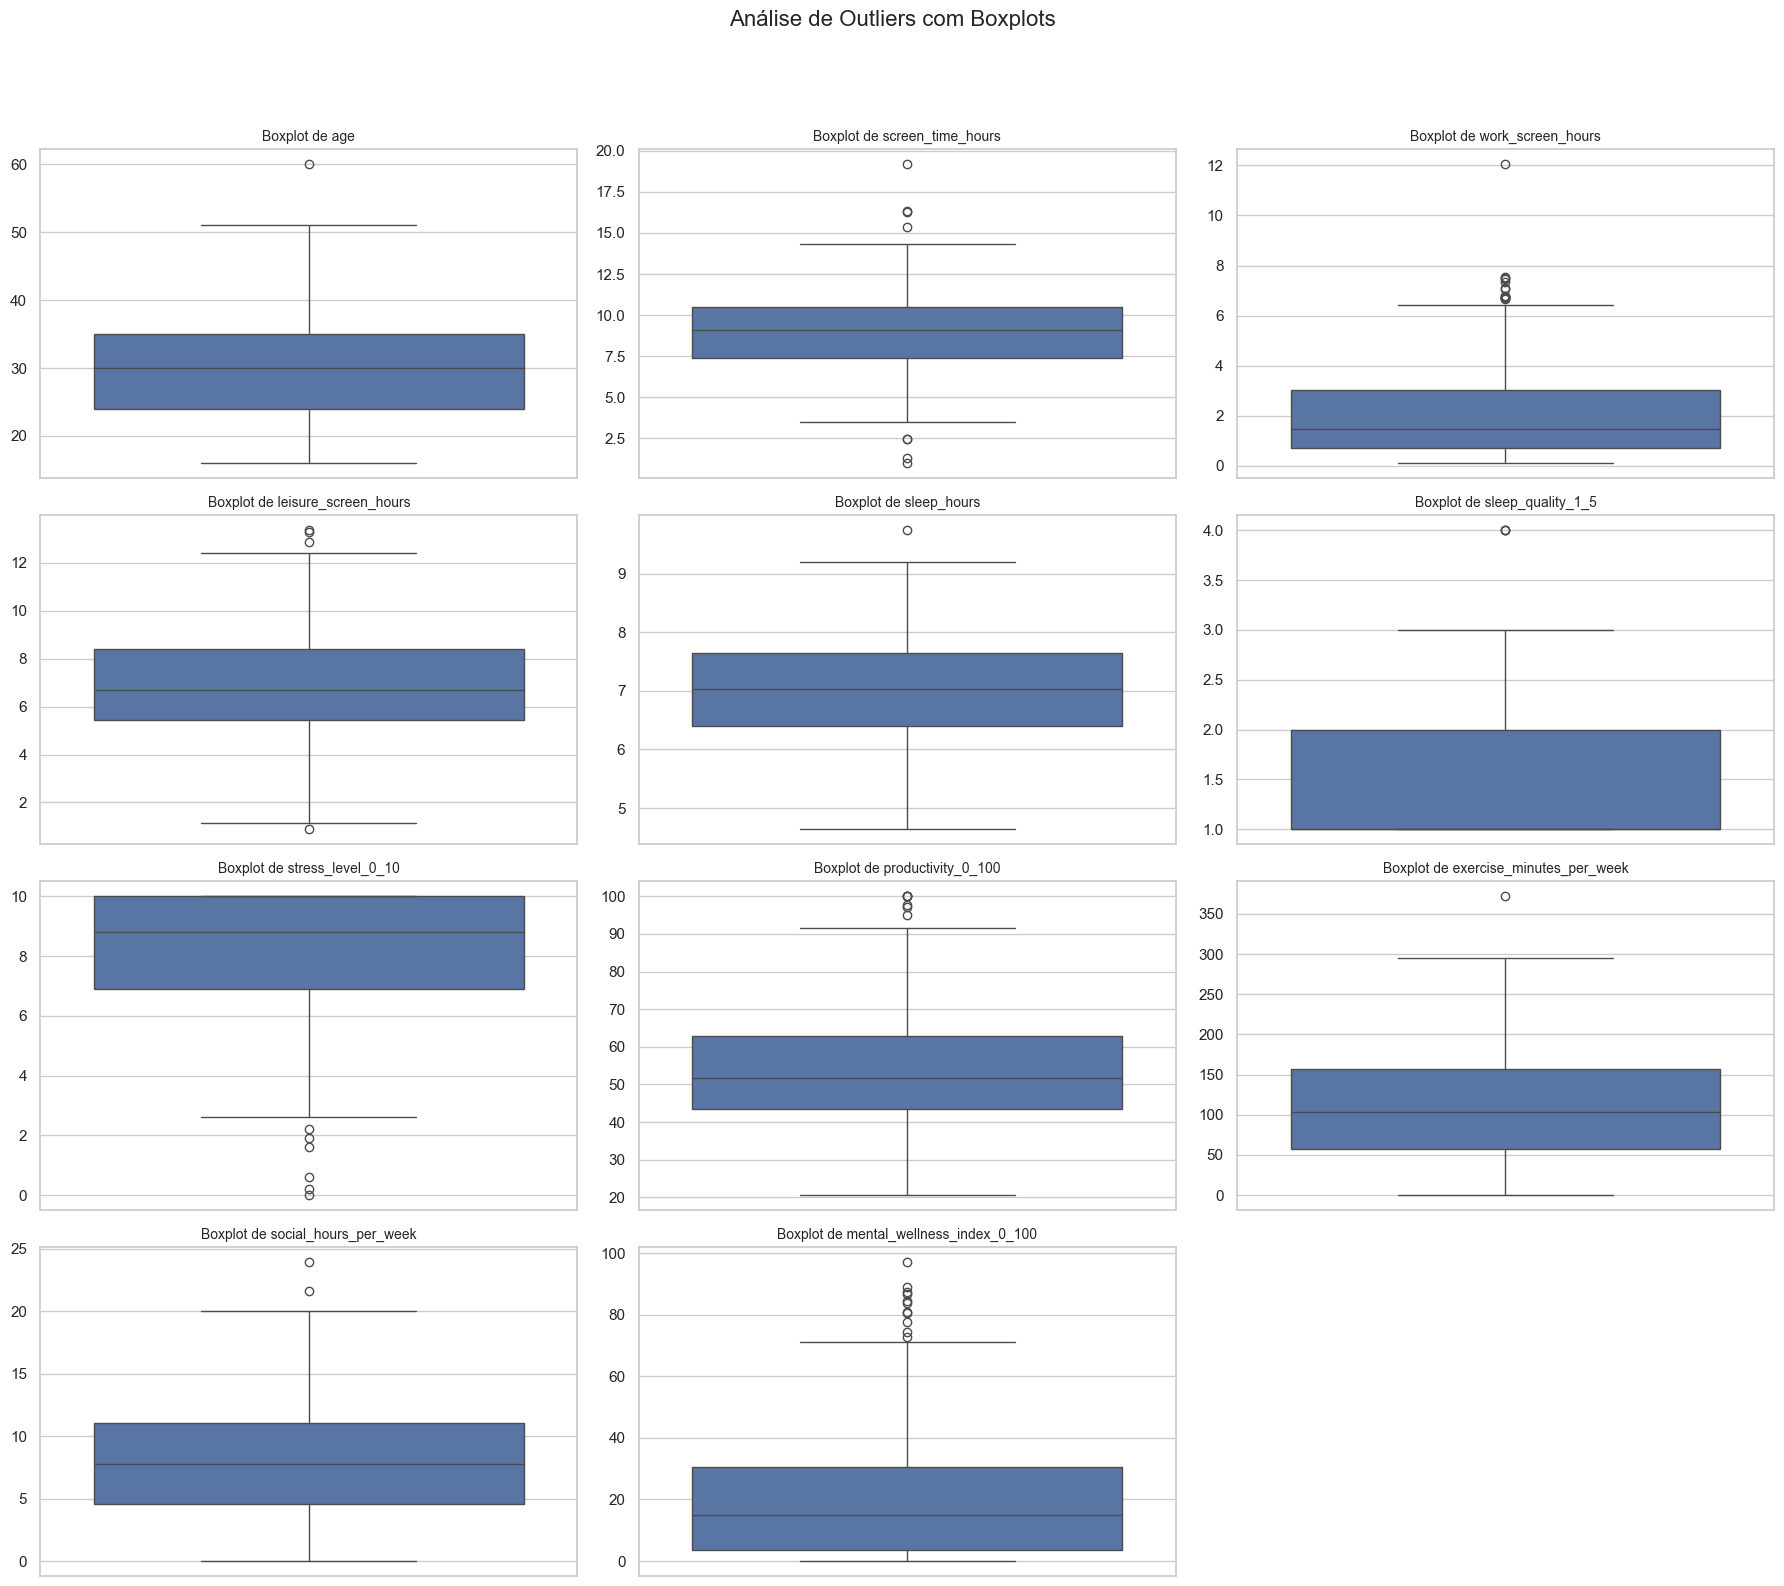

In [9]:
if 'df' in locals():
    # Vamos reutilizar a variável 'numerical_cols' da célula anterior
    if 'numerical_cols' not in locals():
        numerical_cols = df.select_dtypes(include='number').columns
        if 'user_id' in numerical_cols:
            numerical_cols = numerical_cols.drop('user_id')

    plt.figure(figsize=(18, 16)) # Ajustar figsize para 4x3
    layout = (4, 3)
    
    for i, col in enumerate(numerical_cols):
        plt.subplot(layout[0], layout[1], i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot de {col}', fontsize=10)
        plt.ylabel('')
        plt.xlabel('')

    plt.suptitle("Análise de Outliers com Boxplots", y=1.02, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.98])
    plt.show()

`age`:
IQR: A maioria dos participantes (50% centrais) está entre aproximadamente 25 e 35 anos, com a mediana em torno dos 31-32 anos.
Outliers: Existem diversos outliers superiores (acima de ~50 anos). Isso confirma a leve assimetria à direita vista no histograma. Esses participantes são significativamente mais velhos que a maioria da amostra.

`screen_time_hours`:
IQR: A caixa é simétrica e centrada, com a mediana próxima de 9.5-10 horas.
Outliers: Existem alguns outliers em ambos os lados (inferiores e superiores), mas são poucos. Isso confirma a distribuição normal vista no histograma; esses pontos são apenas os valores extremos da amostra.

`work_screen_hours`:
IQR: A caixa é extremamente comprimida e baixa. A mediana e o Q3 (75% dos dados) estão em valores muito baixos (talvez 0 e 2.5 horas, respectivamente).
Outliers: Há um grande número de outliers superiores (a partir de ~6 horas).
Conclusão: Isso confirma a forte assimetria à direita. A maioria esmagadora não usa telas para o trabalho, e os "outliers" são, na verdade, o grupo de pessoas que usam telas para trabalhar. Estes não são erros de dados, mas sim a representação de uma distribuição bimodal ou "zero-inflada".

`leisure_screen_hours`:
IQR: Caixa relativamente simétrica, centrada em torno de 6-7 horas.
Outliers: Identifica alguns outliers inferiores (valores muito baixos).
Conclusão: Confirma a leve assimetria à esquerda (negativa) vista no histograma, onde a maioria dos valores está na faixa mais alta.

`sleep_hours`:
IQR: Caixa muito simétrica, com mediana em torno de 7.5 horas.
Outliers: Quase nenhum outlier visível (talvez um ou dois muito próximos dos limites).
Conclusão: É uma distribuição muito limpa e normal.

`sleep_quality_1_5`:
IQR: A caixa está comprimida entre 1 (Mediana e Q1) e 2 (Q3).
Outliers: O valor 4 aparece como um outlier.
Conclusão: O boxplot não é a melhor ferramenta aqui, mas confirma o que o histograma mostrou: é uma variável discreta/categórica, não contínua. A maioria dos valores é 1, 2 ou 3.

`stress_level_0_10`:
IQR: A caixa está extremamente comprimida e alta na escala. O Q3 e a Mediana estão em 10, e o Q1 está em torno de 7.
Outliers: Existem alguns outliers inferiores (níveis de stress muito baixos).
Conclusão: Confirma a forte assimetria à esquerda (negativa). A grande maioria da amostra relata stress máximo (ou próximo dele), e os "outliers" são os poucos indivíduos com stress baixo.

`productivity_0_100`:
IQR: A caixa é larga e centrada, com mediana em torno de 55-60.
Outliers: Alguns poucos outliers em ambos os lados.
Conclusão: Confirma a distribuição ampla e razoavelmente simétrica. Os outliers são poucos e podem ser considerados normais.

`exercise_minutes_per_week`:
IQR: A caixa está concentrada na parte inferior da escala, com mediana em torno de 100-110 minutos.
Outliers: Vários outliers superiores (pessoas que se exercitam muito, acima de ~300 min).
Conclusão: Confirma a assimetria à direita. A maioria se exercita pouco ou moderadamente, e existe uma "cauda longa" de pessoas que se exercitam muito.

`social_hours_per_week`:
IQR: Caixa concentrada em valores baixos, com mediana em torno de 7-8 horas.
Outliers: Vários outliers superiores (acima de ~22 horas).
Conclusão: Confirma a assimetria à direita. A maioria socializa pouco, e os outliers são os indivíduos muito sociais.

`mental_wellness_index_0_100`:
IQR: A caixa é extremamente comprimida e baixa, similar a work_screen_hours. A mediana está em torno de 20 e o Q3 em torno de 35.
Outliers: Há um grande número de outliers superiores.
Conclusão: Confirma a forte assimetria à direita. A grande maioria da amostra tem um índice de bem-estar baixo. Os "outliers" são a "cauda longa" de indivíduos com bem-estar maior.

### 4.2 Análise Univariada - Variáveis Categóricas

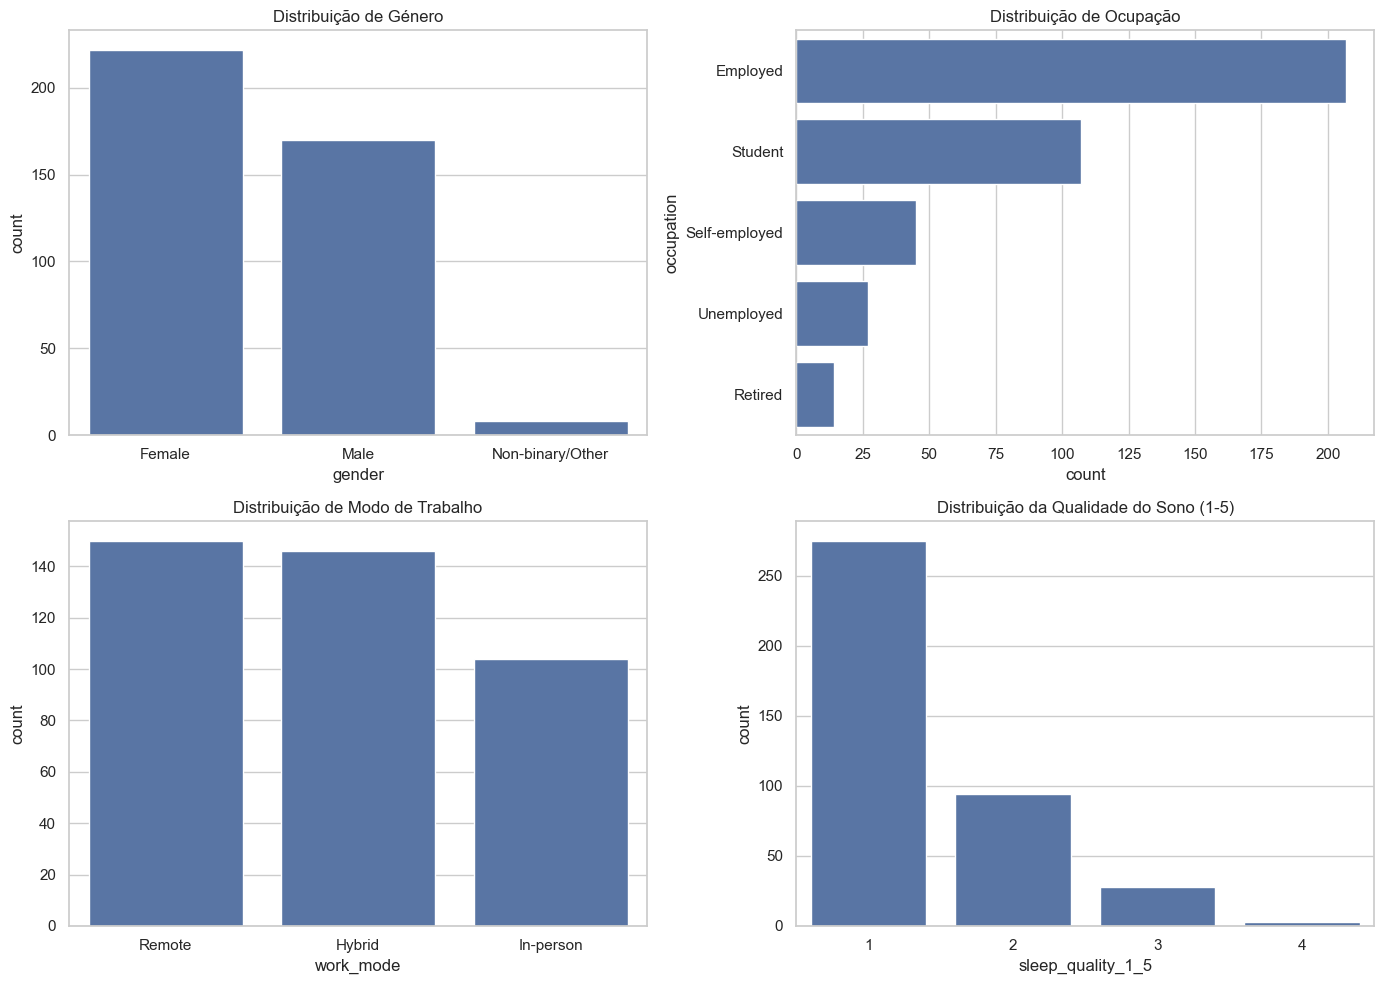

In [10]:
if 'df' in locals():
    categorical_cols = ['gender', 'occupation', 'work_mode', 'sleep_quality_1_5']
    
    plt.figure(figsize=(14, 10)) 
    
    plt.subplot(2, 2, 1) # Posição 1 na grade 2x2
    sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index)
    plt.title('Distribuição de Género')
    
    plt.subplot(2, 2, 2) # Posição 2 na grade 2x2
    sns.countplot(data=df, y='occupation', order=df['occupation'].value_counts().index) # Eixo Y para melhor leitura
    plt.title('Distribuição de Ocupação')

    plt.subplot(2, 2, 3) # Posição 3 na grade 2x2
    sns.countplot(data=df, x='work_mode', order=df['work_mode'].value_counts().index)
    plt.title('Distribuição de Modo de Trabalho')
    
    plt.subplot(2, 2, 4) # Posição 4 na grade 2x2
    sleep_order = sorted(df['sleep_quality_1_5'].dropna().unique())
    sns.countplot(data=df, x='sleep_quality_1_5', order=sleep_order)
    plt.title('Distribuição da Qualidade do Sono (1-5)')
    # ---------------------------------
    
    plt.tight_layout() # Ajusta o espaçamento para evitar sobreposição
    plt.show()

**Observações (Categóricas):**
- A amostra possui uma assimetria género com 50 indivíduos do Género Feminino a mais que do Género Masculino. O número de indivíduos classificados como Outros é desprezível.
- Mais de 50% da ocupação dos indivíduos é de `empregados`
- A distribuição de modo de trabalho é a variável categórica mais uniforme. O trabalho `Remoto`aparece levemente à frente do trabalho `Híbrido`. 1/4 dos indivíduos da pesquisa trabalham no formato `presencial`.
- A variável Qualidade do sono é aqui analisada de maneira categórica, pois não apresenta comportamento de variável numérica. Propomos a seguinte modelagem da variável:
*[1 = Muito Ruim]*
*[2 = Ruim]*
*[3 = Regular]*
*[4 = Bom]*
*[5 = Excelente]*

### 4.3 Análise Multivariada


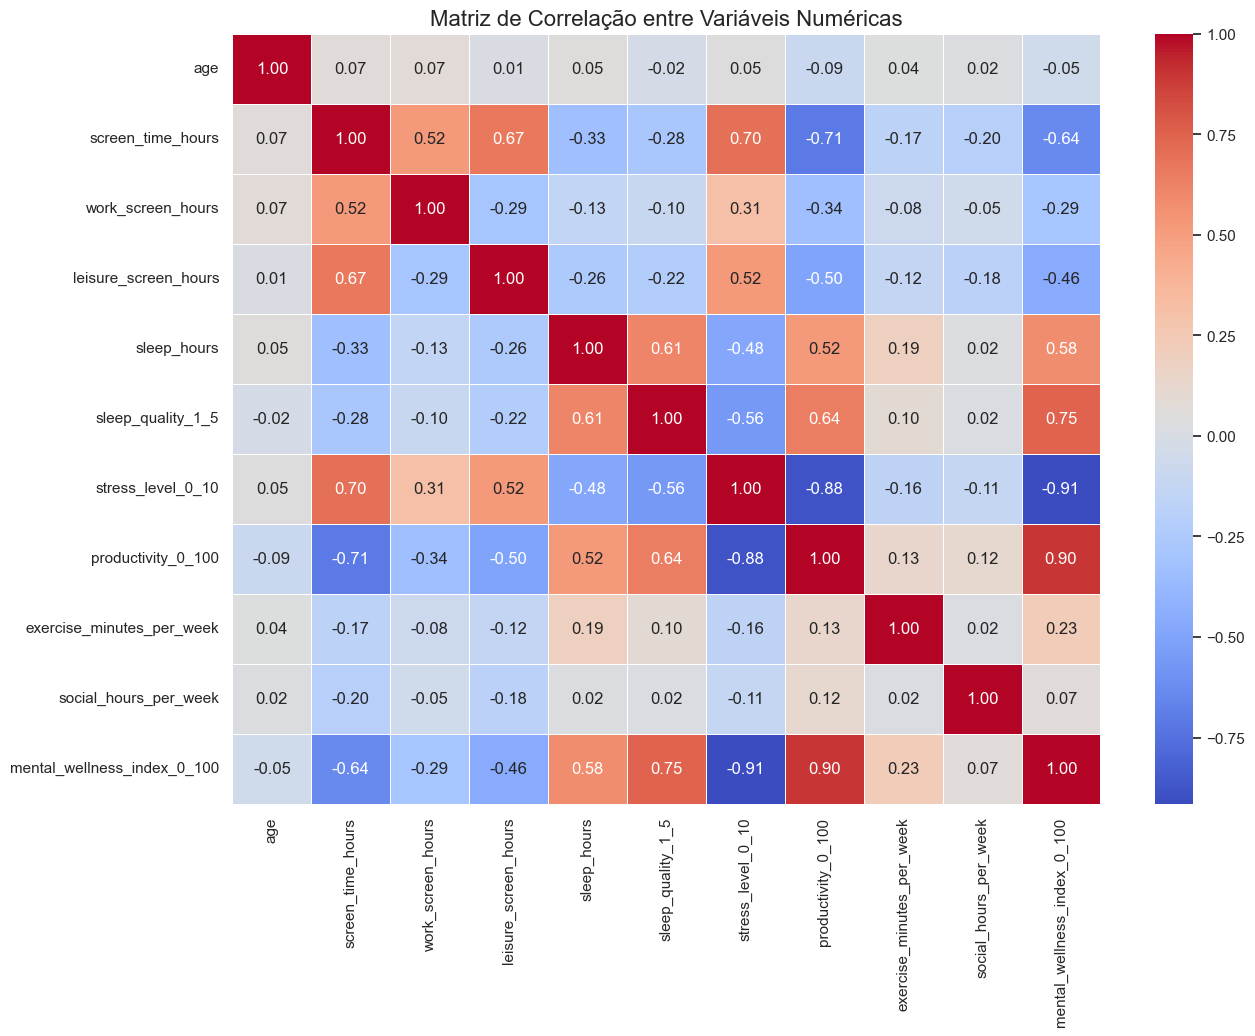

In [11]:
if 'df' in locals():
    # Calcular a matriz de correlação (apenas para colunas numéricas)
    corr_matrix = df[numerical_cols].corr()
    
    # Plotar o heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
    plt.show()

**Observações (Correlação):**
Aqui está um bloco de observações formatado para uma célula Markdown no Jupyter Notebook, com base na análise da matriz de correlação de Pearson.

**1. O "Triângulo" Central do Bem-Estar e Multicolinearidade**

Identificamos um conjunto de correlações extremamente fortes, indicando uma provável multicolinearidade severa. Isso sugere que estas variáveis podem estar medindo o mesmo conceito latente.

* **`stress_level_0_10` vs. `mental_wellness_index_0_100`:** Coeficiente de **-0.91** (Negativa Extremamente Forte). À medida que o stress aumenta, o bem-estar mental diminui de forma quase perfeitamente inversa.
* **`productivity_0_100` vs. `mental_wellness_index_0_100`:** Coeficiente de **+0.90** (Positiva Extremamente Forte). Produtividade e bem-estar mental estão quase perfeitamente alinhados.
* **`stress_level_0_10` vs. `productivity_0_100`:** Coeficiente de **-0.88** (Negativa Extremamente Forte). Stress elevado está fortemente associado a uma produtividade menor.

**Implicação (Modelagem):** Dada a multicolinearidade, não devemos usar estas três variáveis simultaneamente como preditores em modelos de regressão. Deveremos selecionar apenas uma (ex: `mental_wellness_index_0_100`) para representar este construto de "bem-estar/stress".

**2. O Papel do Tempo de Tela (Screen Time)**

O tempo de tela total (`screen_time_hours`) apresenta correlações fortes e moderadas com o "triângulo" central:

* **vs. `stress_level_0_10`:** **+0.71** (Positiva Forte). Mais tempo de tela está associado a mais stress.
* **vs. `productivity_0_100`:** **-0.71** (Negativa Forte). Mais tempo de tela está associado a menos produtividade.
* **vs. `mental_wellness_index_0_100`:** **-0.64** (Negativa Moderada/Forte). Mais tempo de tela está associado a menor bem-estar mental.

**3. A Importância do Sono**

As variáveis de sono mostram uma forte ligação com as métricas de bem-estar, destacando a importância da *qualidade* do sono:

* **`sleep_quality_1_5` vs. `mental_wellness_index_0_100`:** **+0.75** (Positiva Forte). Melhor qualidade de sono percebida está fortemente ligada a maior bem-estar mental.
* **`sleep_quality_1_5` vs. `productivity_0_100`:** **+0.64** (Positiva Moderada/Forte).
* **`sleep_hours` vs. `sleep_quality_1_5`:** **+0.61** (Positiva Moderada/Forte). Como esperado, mais horas de sono estão associadas a uma melhor percepção da qualidade do sono.

**4. Variáveis com Fraca Correlação Linear**

É notável que algumas variáveis, muitas vezes tidas como importantes para o bem-estar, não apresentam correlação linear significativa neste dataset:

* **`age`:** Apresenta correlações quase nulas (entre -0.09 e +0.07) com todas as outras variáveis.
* **`exercise_minutes_per_week`:** Mostra uma correlação fraca com `mental_wellness_index_0_100` (+0.23) e `stress_level_0_10` (-0.16).
* **`social_hours_per_week`:** Também apresenta correlações muito fracas com as métricas centrais.

**Implicação:** A falta de uma correlação *linear* forte não significa que estas variáveis sejam irrelevantes. A relação pode ser não-linear (ex: uma curva em "U") ou simplesmente não ser um fator preditivo tão forte quanto o sono, o stress e o tempo de tela nesta amostra específica.

### 4.4 Análise Focada nos Alvos (Stress e Qualidade do Sono)

Vamos aprofundar a relação entre o tempo de ecrã e os nossos dois principais alvos.

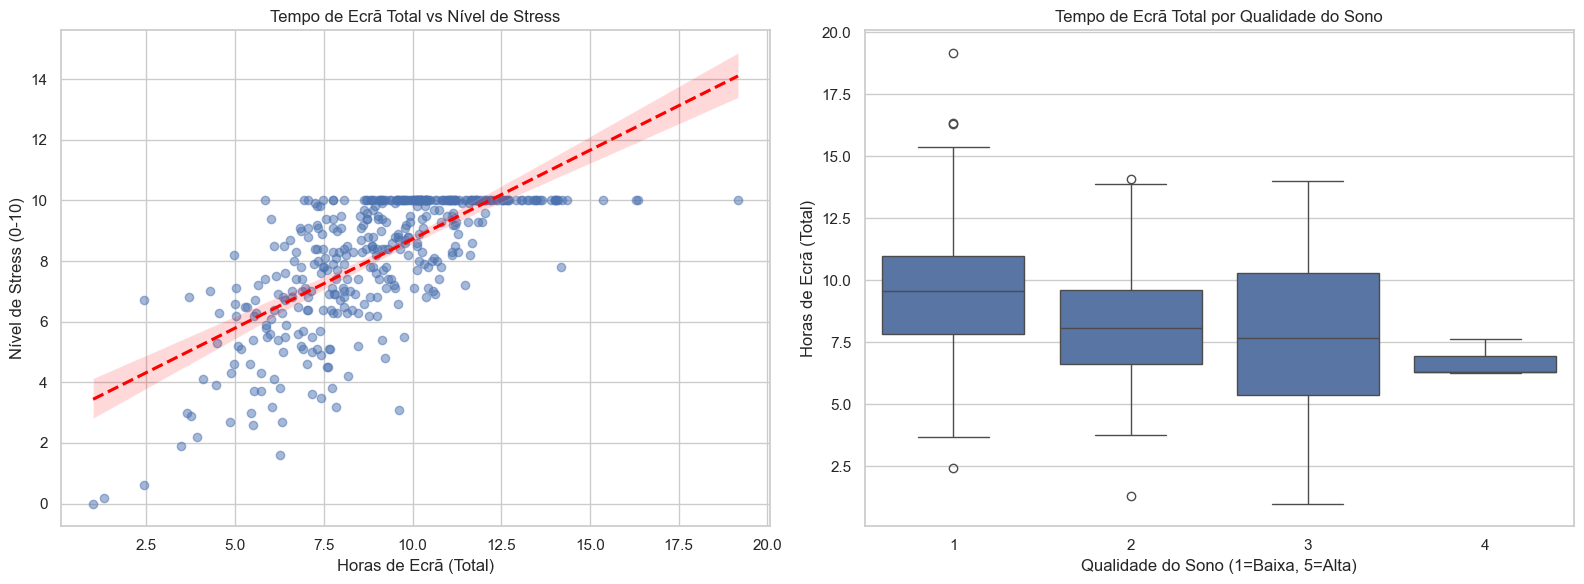

In [12]:
if 'df' in locals():
    plt.figure(figsize=(16, 6))
    
    # Alvo 1: Tempo de Ecrã vs Nível de Stress
    plt.subplot(1, 2, 1)
    sns.regplot(data=df, x='screen_time_hours', y='stress_level_0_10', 
                line_kws={'color': 'red', 'linestyle': '--'}, 
                scatter_kws={'alpha': 0.5})
    plt.title('Tempo de Ecrã Total vs Nível de Stress')
    plt.xlabel('Horas de Ecrã (Total)')
    plt.ylabel('Nível de Stress (0-10)')
    
    # Alvo 2: Tempo de Ecrã vs Qualidade do Sono
    # Como 'sleep_quality' é ordinal (1-5), um boxplot ou violinplot é mais adequado
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='sleep_quality_1_5', y='screen_time_hours')
    plt.title('Tempo de Ecrã Total por Qualidade do Sono')
    plt.xlabel('Qualidade do Sono (1=Baixa, 5=Alta)')
    plt.ylabel('Horas de Ecrã (Total)')
    
    plt.tight_layout()
    plt.show()

### Análise Bivariada

**1. Tempo de Ecrã Total vs Nível de Stress (Scatter Plot)**

* **Variáveis:** `screen_time_hours` (Contínua) vs. `stress_level_0_10` (Contínua/Ordinal)
* **Observação 1 (Tendência):** O gráfico de dispersão com a linha de regressão (vermelha) confirma visualmente a **correlação positiva forte (+0.71)** observada na matriz. À medida que o "Tempo de Ecrã (Total)" aumenta, o "Nível de Stress" reportado também tende a aumentar linearmente.
* **Observação 2 (Efeito Teto):** A visualização expõe um "efeito teto" (ceiling effect) na variável `stress_level_0_10`. Há uma concentração massiva de pontos de dados no valor máximo (10) para uma ampla gama de tempos de ecrã (de ~7.5 a 12.5 horas).
* **Implicação:** A verdadeira relação pode ser ainda mais forte. Indivíduos com alto tempo de ecrã podem ter níveis de stress "superiores a 10", mas a escala os limita ao valor máximo. Isso reforça a conclusão da análise de histograma de que a variável `stress_level_0_10` tem uma forte assimetria à esquerda (negativa).

**2. Tempo de Ecrã Total por Qualidade do Sono (Boxplot)**

* **Variáveis:** `sleep_quality_1_5` (Categórica/Ordinal) vs. `screen_time_hours` (Contínua)
* **Observação 1 (Tendência):** O gráfico mostra uma clara tendência negativa. A mediana do tempo de ecrã diminui à medida que a qualidade do sono reportada aumenta.
    * **Qualidade 1 (Baixa):** Apresenta a mediana de tempo de ecrã mais alta (aprox. 9.5 horas) e a maior variabilidade (IQR mais largo).
    * **Qualidade 2 e 3 (Média):** Apresentam medianas progressivamente mais baixas.
    * **Qualidade 4 (Alta):** Apresenta a mediana de tempo de ecrã mais baixa (aprox. 7 horas) e uma distribuição muito compacta (baixa variabilidade).
* **Observação 2 (Outliers):** A categoria de pior qualidade do sono (1) também possui os outliers mais extremos de alto tempo de ecrã (valores acima de 15 horas). Em contrapartida, as categorias de melhor qualidade (3 e 4) apresentam alguns outliers de *baixo* tempo de ecrã.
* **Implicação:** Esta visualização é muito mais rica do que o simples coeficiente de correlação (-0.28). Ela demonstra que a relação não é apenas uma leve tendência, mas uma diferença clara nas distribuições de tempo de ecrã entre os grupos de qualidade do sono. Isso valida a decisão de tratar `sleep_quality_1_5` como uma variável categórica para análise.

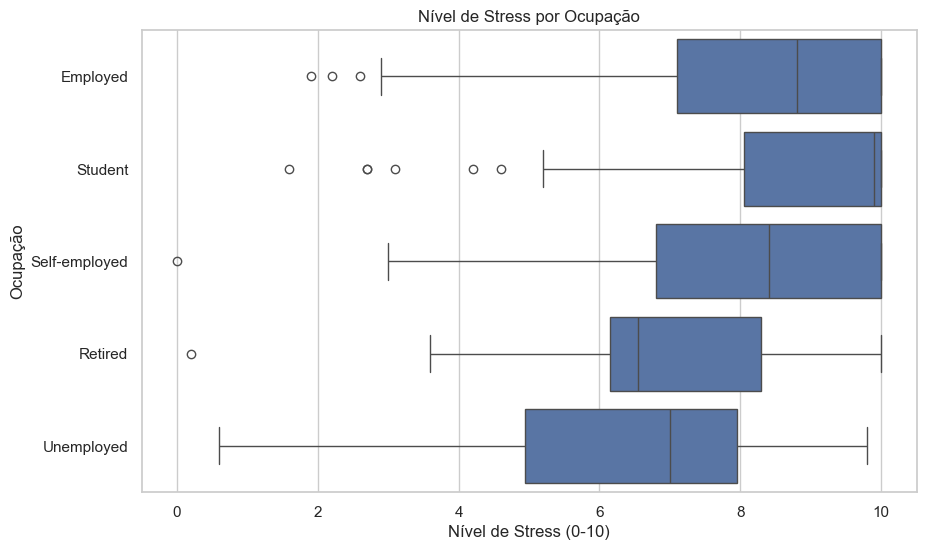

In [13]:
if 'df' in locals():
    # Vamos analisar o stress por Ocupação
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='stress_level_0_10', y='occupation')
    plt.title('Nível de Stress por Ocupação')
    plt.xlabel('Nível de Stress (0-10)')
    plt.ylabel('Ocupação')
    plt.show()

**Observações (Ocupação):**
- Employed (Empregado): Mediana alta (≈8). 50% das pessoas estão entre 7 e 9. Existem alguns indivíduos com stress muito baixo (outliers).
- Student (Estudante): A mediana mais alta (≈8.5). 50% estão entre 7.5 e 9.5. Também tem vários outliers com stress baixo.
- Self-employed (Independente): Mediana de (≈7.5). 50% estão entre 6.5 e 8.5.
- Retired (Reformado): Mediana baixa (≈7). Grupo com menor variação, com 50% entre 6 e 8.
- Unemployed (Desempregado): Mediana baixa (≈7), mas com a maior variação de todas. Os níveis de stress neste grupo são muito inconsistentes, indo de muito baixos a muito altos.

## 5. Relatório Sumário da Exploração

*(Esta secção seria o "Data Exploration Report" do CRISP-DM)*

1.  **Qualidade dos Dados:** O dataset apresenta-se [limpo / com alguns problemas], [sem / com] valores omissos e [sem / com] duplicados.
2.  **Distribuições:** 
    - A maioria dos participantes reporta níveis de stress [altos / baixos / médios] e qualidade de sono [baixa / alta].
    - A ocupação mais frequente é [Ocupação] e o modo de trabalho é [Modo].
3.  **Principais Relações (Hipóteses Iniciais):**
    - Foi encontrada uma correlação [positiva/negativa] e [fraca/moderada/forte] entre `screen_time_hours` e `stress_level_0_10` (Valor: [cor_valor]).
    - Foi encontrada uma correlação [positiva/negativa] e [fraca/moderada/forte] entre `screen_time_hours` e `sleep_quality_1_5` (Valor: [cor_valor]).
    - A variável `mental_wellness_index_0_100` parece ser fortemente influenciada por [variável] e [variável].

**Próximos Passos (Data Preparation):**
- Tratar os outliers identificados em [coluna] (se houver).
- Transformar variáveis categóricas (`gender`, `occupation`, `work_mode`) em numéricas (ex: One-Hot Encoding) para os modelos de machine learning.
- Selecionar as *features* (variáveis) mais relevantes para a modelação (`Feature Selection`).
- Normalizar/Standardizar os dados, se os modelos a utilizar o exigirem (ex: SVM, Redes Neuronais).

# Projeto 1: Fase de Data Preparation (CRISP-DM)


Vamos focar-nos em 4 tarefas principais:
1.  **Data Selection:** Remover colunas desnecessárias.
2.  **Data Construction (Feature Engineering):** Criar colunas mais informativas.
3.  **Data Cleaning:** Tratar os *outliers* que identificámos na exploração.
4.  **Data Formatting:** Converter todos os dados para um formato numérico e escalado (Encoding e Scaling).

## 0. Importar Bibliotecas e Carregar Dados

Começamos por importar o `pandas` e o `numpy` para manipulação, e `sklearn` para as nossas ferramentas de preparação. Também carregamos o dataset original.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")
%matplotlib inline

# Carregar o dataset
try:
    df = pd.read_csv('../assets/ScreenTime vs MentalWellness.csv')
    print("Dataset original carregado com sucesso!")
    print(f"Shape original: {df.shape}")
except FileNotFoundError:
    print("Erro: Ficheiro 'ScreenTime vs MentalWellness.csv' não encontrado.")

# Criar uma cópia para a preparação, para manter o original intacto
df_prep = df.copy()
df_prep.head()

Dataset original carregado com sucesso!
Shape original: (400, 15)


,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


## 1. Data Selection (Seleção de Dados)

Na fase de *Data Understanding*, vimos que `user_id` é apenas um identificador. Não tem qualquer valor preditivo e deve ser removido.

In [15]:
if 'df_prep' in locals():
    # 'user_id' é um identificador único, não uma feature
    df_prep = df_prep.drop('user_id', axis=1)
    print("Coluna 'user_id' removida.")
    print(f"Novo shape: {df_prep.shape}")

Coluna 'user_id' removida.
Novo shape: (400, 14)


## 2. Data Construction (Feature Engineering)

Temos `screen_time_hours` (total), `work_screen_hours` (trabalho) e `leisure_screen_hours` (lazer). É provável que `screen_time_hours` inclua mais do que apenas trabalho e lazer (ex: ecrã de telemóvel genérico). 

Vamos criar uma nova feature chamada `other_screen_hours` para capturar este tempo "não explicado".

In [16]:
if 'df_prep' in locals():
    # Calcular o tempo de ecrã "outro"
    df_prep['other_screen_hours'] = df_prep['screen_time_hours'] - (df_prep['work_screen_hours'] + df_prep['leisure_screen_hours'])
    
    # Se 'other_screen_hours' for negativo (devido a erros de arredondamento ou reporte), definimos como 0
    df_prep['other_screen_hours'] = df_prep['other_screen_hours'].clip(lower=0)
    
    print("Nova feature 'other_screen_hours' criada.")
    df_prep[['screen_time_hours', 'work_screen_hours', 'leisure_screen_hours', 'other_screen_hours']].head()

Nova feature 'other_screen_hours' criada.


**Nota:** Agora temos multicolinearidade (`screen_time_hours` é uma soma das outras três). Para a modelação, devemos usar `work_screen_hours`, `leisure_screen_hours` e `other_screen_hours`, e **remover `screen_time_hours`**. Faremos isso no passo final de seleção de features.

## 3. Data Cleaning (Tratamento de Outliers)

Na exploração (main.ipynb), vimos que `exercise_minutes_per_week` e `social_hours_per_week` (e talvez outras) tinham outliers significativos. Modelos como a Regressão Linear são sensíveis a outliers.

Vamos usar a técnica de **Capping (Winsorizing)**: limitar os valores ao percentil 1% e 99% (ou 5% e 95%) para reduzir o seu impacto sem os eliminar.

Outliers tratados com Capping (Percentis 1% e 99%).


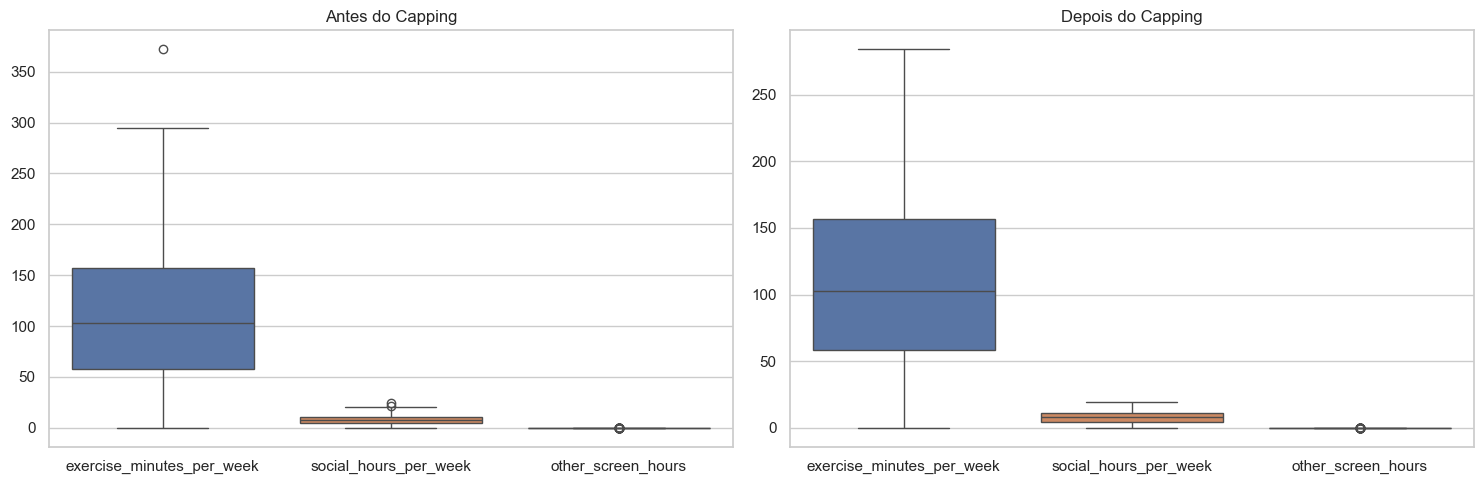

In [17]:
if 'df_prep' in locals():
    # Colunas identificadas com outliers na exploração
    cols_to_cap = ['exercise_minutes_per_week', 'social_hours_per_week', 'other_screen_hours']

    # Plotar Boxplots (Antes)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_prep[cols_to_cap])
    plt.title("Antes do Capping")

    # Aplicar Capping (limitamos ao 1º e 99º percentil)
    for col in cols_to_cap:
        lower_limit = df_prep[col].quantile(0.01)
        upper_limit = df_prep[col].quantile(0.99)
        df_prep[col] = df_prep[col].clip(lower=lower_limit, upper=upper_limit)
        
    print("Outliers tratados com Capping (Percentis 1% e 99%).")

    # Plotar Boxplots (Depois)
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_prep[cols_to_cap])
    plt.title("Depois do Capping")
    plt.tight_layout()
    plt.show()

## 4. Data Formatting (Encoding e Scaling)

Os modelos de ML não entendem texto (ex: 'Female', 'Remote'). Precisamos de converter todas as colunas categóricas em números. Usaremos **One-Hot Encoding**.

Depois, muitas colunas têm escalas diferentes (ex: `age` 18-65 vs `stress_level_0_10` 0-10). Isto pode enviesar os modelos. Vamos normalizar tudo usando **Standard Scaling** (Z-score).

### 4.1 Encoding de Variáveis Categóricas

Vamos usar `pd.get_dummies` para converter `gender`, `occupation` e `work_mode` em colunas numéricas (0 ou 1). `drop_first=True` evita a "dummy variable trap" (multicolinearidade).

In [18]:
if 'df_prep' in locals():
    categorical_cols = ['gender', 'occupation', 'work_mode']
    
    # Guardar as colunas originais para referência
    original_cols = df_prep.columns
    
    # Aplicar One-Hot Encoding
    df_prep = pd.get_dummies(df_prep, columns=categorical_cols, drop_first=True)
    
    print("Variáveis Categóricas convertidas com One-Hot Encoding:")
    # Mostrar as novas colunas criadas
    new_cols = [col for col in df_prep.columns if col not in original_cols]
    print(new_cols)
    
    df_prep.head()

Variáveis Categóricas convertidas com One-Hot Encoding:
['gender_Male', 'gender_Non-binary/Other', 'occupation_Retired', 'occupation_Self-employed', 'occupation_Student', 'occupation_Unemployed', 'work_mode_In-person', 'work_mode_Remote']


### 4.2 Scaling de Variáveis Numéricas

Agora que *todas* as colunas são numéricas, vamos escalar as *features* (variáveis de entrada) para terem média 0 e desvio padrão 1. 

**Importante:** Não escalamos as nossas variáveis-alvo (targets)! (`sleep_quality_1_5` e `stress_level_0_10`).

In [19]:
if 'df_prep' in locals():
    # Definir os nossos alvos (targets)
    target_cols = ['stress_level_0_10', 'sleep_quality_1_5', 'mental_wellness_index_0_100'] 
    # O mental_wellness_index também é um alvo/resultado, não uma feature de entrada
    
    # Obter a lista de todas as features (colunas que não são alvos)
    # Também removemos 'screen_time_hours' (redundante) como discutido no passo 2
    features_to_scale = [col for col in df_prep.columns if col not in target_cols]
    if 'screen_time_hours' in features_to_scale:
        features_to_scale.remove('screen_time_hours')
        
    print(f"Total de features para escalar: {len(features_to_scale)}")
    print(features_to_scale)
    
    # Inicializar o Scaler
    scaler = StandardScaler()
    
    # Criar um novo DataFrame para os dados preparados
    df_final = df_prep.copy()
    
    # Aplicar o scaling (fit_transform) APENAS nas colunas de features
    df_final[features_to_scale] = scaler.fit_transform(df_final[features_to_scale])
    
    print("\nDados escalados com StandardScaler (Z-score):")
    df_final[features_to_scale].describe()

Total de features para escalar: 16
['age', 'work_screen_hours', 'leisure_screen_hours', 'sleep_hours', 'productivity_0_100', 'exercise_minutes_per_week', 'social_hours_per_week', 'other_screen_hours', 'gender_Male', 'gender_Non-binary/Other', 'occupation_Retired', 'occupation_Self-employed', 'occupation_Student', 'occupation_Unemployed', 'work_mode_In-person', 'work_mode_Remote']

Dados escalados com StandardScaler (Z-score):


## 5. Preparação Final para Modelação (X e y)

O nosso `df_final` está agora pronto. A prática comum é separá-lo na matriz de features (`X`) e no vetor alvo (`y`).

O seu projeto (`projectos_aase_2526.pdf`) pedia dois modelos de regressão:
1.  Prever `stress_level_0_10`
2.  Prever `sleep_quality_1_5`

In [20]:
if 'df_final' in locals():
    # X (Features) são todas as colunas escaladas que definimos anteriormente
    X = df_final[features_to_scale]
    
    # y (Targets) são as colunas alvo originais (sem scaling)
    y_stress = df_final['stress_level_0_10']
    y_sleep = df_final['sleep_quality_1_5']
    
    print("Matriz de Features X (Head):")
    display(X.head())
    
    print("\nVetor Alvo y_stress (Head):")
    display(y_stress.head())
    
    print("\nVetor Alvo y_sleep (Head):")
    display(y_sleep.head())

Matriz de Features X (Head):


,age,work_screen_hours,leisure_screen_hours,sleep_hours,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,other_screen_hours,gender_Male,gender_Non-binary/Other,occupation_Retired,occupation_Self-employed,occupation_Student,occupation_Unemployed,work_mode_In-person,work_mode_Remote
0,0.432159,1.688484,-0.672563,-0.450077,-0.640379,0.252673,-1.482116,-0.313328,-0.859727,-0.142857,-0.190445,-0.356034,-0.604308,-0.269047,-0.592749,1.290994
1,-0.238375,-0.939950,0.084835,1.217853,1.579433,-0.514327,-1.193276,-0.313328,-0.859727,-0.142857,-0.190445,-0.356034,-0.604308,-0.269047,1.687055,-0.774597
2,0.700373,-0.566682,0.833218,-0.626267,-0.167086,-0.615628,0.023978,-0.313328,-0.859727,-0.142857,-0.190445,-0.356034,-0.604308,-0.269047,-0.592749,-0.774597
3,1.639121,-0.841449,1.680783,-0.144681,-1.153669,-1.585231,-0.450545,-0.313328,1.163160,-0.142857,-0.190445,-0.356034,-0.604308,-0.269047,-0.592749,-0.774597
4,-0.238375,0.988605,1.031584,-1.436740,-1.053678,0.484220,0.457238,-0.313328,1.163160,-0.142857,-0.190445,-0.356034,1.654786,-0.269047,-0.592749,1.290994



Vetor Alvo y_stress (Head):


0     9.3
1     5.7
2     9.1
3    10.0
4    10.0
Name: stress_level_0_10, dtype: float64


Vetor Alvo y_sleep (Head):


0    1
1    3
2    1
3    1
4    1
Name: sleep_quality_1_5, dtype: int64

# Conclusão e Próximos Passos

O *Data Preparation* está concluído. 

Temos agora:
- `X`: Um DataFrame/Matriz contendo **todas as nossas features** limpas, tratadas para outliers, e formatadas (one-hot encoded e standard scaled).
- `y_stress`: O nosso vetor alvo para o primeiro modelo de regressão.
- `y_sleep`: O nosso vetor alvo para o segundo modelo de regressão.

Os seus dados estão perfeitamente preparados para a próxima fase do CRISP-DM: **Modeling**.